# Feed Forward networks
Let's build  a simple feed forward network to classify the Fashion MNIST dataset, which relying on keras to set up the network for us. Along the way, we'll explore how to visualize the data and the network.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data

Let's explore the shape of the data. We need to get the dimension correct to know how to build the network.

In [32]:
# Import fashion mnist
(train_images, train_labels), (test_images,
                               test_labels) = tf.keras.datasets.fashion_mnist.load_data()
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=train_images.shape))
print("Training set (labels) shape: {shape}".format(shape=train_labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=test_images.shape))
print("Test set (labels) shape: {shape}".format(shape=test_labels.shape))

# Create dictionary of target classes
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

Training set (images) shape: (60000, 28, 28)
Training set (labels) shape: (60000,)
Test set (images) shape: (10000, 28, 28)
Test set (labels) shape: (10000,)
[9 0 0 ... 3 0 5]


We can go ahead and visualize some examples from the dataset, so that we know what we're working with.

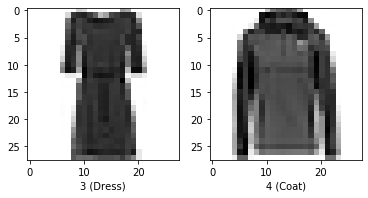

In [45]:
# Sample 1
# Get vector into 28 x 28 image format.
SAMPLE_1_INDEX = 47
sample_1 = train_images[SAMPLE_1_INDEX]
# Get corresponding integer label from one-hot encoded data
sample_label_1 = train_labels[SAMPLE_1_INDEX]
# Plot the sample
label = label_dict[sample_label_1]
plt.subplot(1, 2, 1)
plt.imshow(sample_1, cmap='Greys')
plt.xlabel(f"{sample_label_1} ({label})")

# Sample 2
# Get vector into 28 x 28 image format.
SAMPLE_2_INDEX = 24
sample_2 = train_images[SAMPLE_2_INDEX]
# Get corresponding integer label from one-hot encoded data
sample_label_2 = train_labels[SAMPLE_2_INDEX]
# Plot the sample
label = label_dict[sample_label_2]
plt.subplot(1, 2, 2)
plt.imshow(sample_2, cmap='Greys')
plt.xlabel(f"{sample_label_2} ({label})")
plt.show()

Now we can start building the network!

We will build a 3 layer feedforward network with 128 units in each hidden layer. We can use ReLU activation function for the hidden layers, and then we'll pass to a softmax function of 10 units, one for each output class.

In [51]:
# First let's set up the parameters
n_hidden_1 = 128  # Units in first hidden layer
n_hidden_2 = 128  # Units in second hidden layer
n_input = 784  # Fashion MNIST data input (img shape: 28*28)
n_classes = 10  # Fashion MNIST total classes (0–9 digits)
n_samples = train_images.shape[0]  # Number of examples in training set

# Create placeholders


def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.

    Args:
    n_x -- scalar, size of an image vector
    n_y -- scalar, number of classes

    Returns:
    X -- placeholder for the data input, of shape [x_n, None] and dtype float
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype float
    """

    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    return X, Y

# Initialize weights and biases for each layer. These will be
# updated during training.


def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow.

    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """

    # Set random seed for reproducibility
    tf.set_random_seed(42)  # Answer to life, the universe, and everything

    # Initialize weights and biases for each layer
    # First hidden layer
    W1 = tf.get_variable("W1", [n_hidden_1, n_input],
                         initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b1 = tf.get_variable("b1", [n_hidden_1, 1],
                         initializer=tf.zeros_initializer())